# Titanic 数据科学解决方案

这篇笔记是 Data Science Solutions 这本书的附件。这篇笔记将带领我们体验典型的工作流程，来解决像 Kaggle 这样的网站上的数据科学竞赛。

## 工作流程

工作流程大致分为 7 个阶段。

1. 问题定义（Question or problem definition）
2. 获取训练和测试数据（Acquire training and testing data）
3. 整合、准备、清洗数据（Wrangle, prepare, cleanse the data）
4. 分析、识别模式、和探索数据（Analyze, identify patterns, and explore the data）
5. 建模、预测和解决问题（Model, predict and solve the problem）
6. 可视化、导出报告、和展示问题解决步骤和最终解决方案（Visualize, report, and present the problem solving steps and final solution）
7. 提供或者提交结果（Supply or submit the results）

以上的工作流程阐述了一般解决问题的顺序。但是，也有例外。

- 我们可以合并多个阶段。例如：我们可能通过可视化数据进行分析。
- 提前执行某个阶段。例如：我们可能在整合数据之前或之后分析数据。
- 多次执行某个阶段。例如：可视化数据可能将被执行多次。
- 不执行某个阶段。例如：我们可能不需要提交结果。

## 问题定义

像 Kaggle 这样的竞赛网站已经定义了要解决的问题，或者提出问题，并且与此同时提供数据集方便你训练模型和测试模型结果。Titanic 竞赛的问题的定义的描述如下。

> 根据给出的训练数据集样本，建模预测测试数据集中乘客的存活。训练数据集中包含了乘客的基本属性和存活属性，测试数据集中只包含了乘客的基本属性。

我们可能也想了解一些问题的领域知识。在 Kaggle 网页中的 Decription 模块有阐述相关领域知识。例如：

- 1912 年 4 月 15 日，泰坦尼克号在首航期间，与冰山相撞后沉没，在 2224 名乘客和船员中造成 1502 人死亡，大约 32％ 的存活率。
- 造成这种生命损失的原因之一是乘客和船员没有足够的救生艇。
- 虽然船体遇难下沉是偶然事件，但一些群体比女性，儿童和上层阶级更有可能生存下去。

## 工作流程的目标

这样的工作流程主要是为了实现以下的 7 个目标：

**分类（Classifying）**。我们想对我们的样品进行分类。我们也想了解不同的类别对我们的解决方案目标的影响或关联。

**关联（Correlating）**。人们可以根据训练数据集中的可用特征来解决问题。数据集中的哪些特征有助于我们的目标？在统计学上，特征和目标之间是否存在相关性？随着特征值的变化，目标值也会改变，反之亦然？这可以通过对给定数据集中的数字和类别特征进行测试。我们也想要确定特征与特征之间的相关性。相关的某些特征可能有助于创建、补全或者修正特征。

**转换（Converting）**。对于建模阶段，需要准备数据。根据模型算法的选择，可能需要将所有特征转换为数字类型的值。例如将文本类别值转换为数值。

**补全（Completing）**。特征中有可能存在缺失值，我们需要补全这些缺失值。当没有缺失值时，模型算法可能更有效。

**修正（Correcting）**。对于给定的训练数据集中的错误值或者可能不正确的值，我们可以尝试修正这些值或者舍弃这些包含错误值的样本。对于与目标不相关的或者故意歪曲结果的特征，我们也可以直接舍弃该特征。

**创建（Creating）**。我们可以根据现有特征创建新的特征，新特征要满足相关性（与目标相关）、转换性（已转换成数值）和完整性（无缺失值）。

**作图（Charting）**。我们可以使用可视化的图表来揭示数据和目标之间的关系。

In [5]:
# 数据分析
import pandas as pd
import numpy as np
import random as rnd

# 可视化
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 机器学习
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## 获取数据

Python 的 Pandas 包可以帮助我们处理数据集。我们将训练和测试数据集通过 Pandas 加载成 DataFrames 类型。然后将这些数据集合结合在一起。

In [6]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
combine = [train_df, test_df]

## 分析数据

Pandas 可以描述数据，以回答以下问题：

### 数据集中有哪些有效特征？

为了直接操纵和分析特征，获取特征名称。

In [7]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### 哪些特征是类别型的？

这些值将样本划分为多个相似样本的集合。类别特征一般都是名词、序数词、比率或者间隔值。除此之外，这有助于我们选择适当的图表进行可视化绘图。

- 类别特征：Survived, Sex, Embarked, Pclass

### 哪些特征是数值型的？

数值特征是离散值、连续值或者时间序列值。除此之外，这有助于我们选择适当的图表进行可视化绘图。

- 连续值：Age, Fare
- 离散值：SibSp, Parch

In [8]:
# 预览数据
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 哪些特征是混合数据类型？

这种特征中一般混合着数字和字母。这种特征一般也是修正的目标。

- Ticket 就是一个数字和字母混合的类型
- Cabin 包含字母

### 哪些特征可能包含错误或者错别字？

这对于大型数据集来说很难检查，但是从较小的数据集中检查几个样本可能可以提醒我们，哪些特征可能需要更正。

- Name 可能包含错误或者错别字，因为名字可以有多种方式描述，包括：头衔、圆括号和带引号的简称等

In [9]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 哪些特征包含空格、null 值或者空值？

这些特征需要被修正。

- Cabin > Age > Embarked，训练集中的这些特征包含多个空值
- Cabin > Age，测试集中的这些特征是残缺的

### 不同的特征的数据类型是什么？

这个问题有助于我们对特征做转换。

- 训练集中 7 个特征是整型或者浮点型，测试集中 6 个特征
- 5 个特征是字符串类型

In [10]:
train_df.info()
print('_' * 40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

### 数值特征在样本中的分布是如何的？

这个可以帮助我们确定，实际问题领域的训练数据集的代表性如何？

- 样本总数量为 891 或者说是 实际乘客数量的 40%（2224）
- Survived 特征是一个类别特征，取值为 0 或者 1
- 样本中的存活率为 38%，而实际存活率为 32%
- 大多数的乘客（> 75%）没有携带父母孩子
- 大约 30% 的乘客携带了兄弟姐妹或者配偶
- 费用差异很大，少量乘客（< 1%）支付了 $512
- 年龄在 65 - 80 的老年乘客极少

In [11]:
train_df.describe()
# 通过 'percentiles=[.61, .62]' 回顾存活率，可以了解到存活率为 38%
# 通过 'percentiles=[.75, .8]' 回顾 Parch 的分布
# 通过 'percentiles=[.68, .69]' 回顾 SibSp 的分布
# 通过 'percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]' 回顾 Age 和 Fare 的分布

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 类别特征在样本中的分布是如何的？

- Name 在样本数据中是唯一的（count=unique=891）
- Sex 特征只有两种取值，65% 为男性（top=male, freq=577/count=891）
- Cabin 在样本数据中有多个重复值。或者多位乘客公用一间客舱
- Embarked 有三种取值，S 是最多乘客使用的（top=S）
- Ticket 的重复率比较高，大约为 22%（unique=681）

In [12]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644



## 基于数据分析的假设

我们根据迄今为止的数据分析得出以下假设。我们可以在采取适当行动之前进一步验证这些假设。

**关联（Correlating）**。

我们想知道每个特征与目标存活的关联性。我们希望在项目的早期做到这一点，并将这些快速相关性与项目后期的建模相关性进行匹配。

**补全（Completing）**。

1. 我们想补全 Age 特征，因为它与目标是相关联的。
2. 我们想补全 Embarked 特征，因为它也与目标或者另外一个重要的特征相关联。

**修正（Correcting）**。

1. Ticket 特征可能会从我们的分析中被移除，因为它包含了较高比例的重复，并且 Ticket 和目标之间可能没有相关性。
2. Cabin 特征可能会被移除，因为它在训练集和测试集中都非常不完整，或者说包含了许多空值。
3. PassengerId 特征可能会被移除，因为它与目标无关。
4. Name 特征是一个相对来说不规范的特征，可能与目标之间没有之间的相关性，所以也可能会被移除。

**创建（Creating）**。

1. 基于 Parch 和 SibSp，我们想创建一个新的特征，命名为 Family，用来记录上船的家人数目。
2. 我们想要从 Name 特征中提取出 Title 作为一个新的特征。
3. 我们想要为年龄段创建一个新的特征。这个操作将一个连续的数值特征转换成了一个序数型的类别特征。
4. 我们想要为费用范围创建一个新的特征。

**分类（Classifying）**。

我们也可以根据前面提到的问题描述增加我们的假设。

1. 女人（Sex=female）更容易存活。
2. 孩子（Age<？）更容易存活。
3. 高级乘客（Pclass=1）更容易存活。

## 围绕特征进行分析

为了确认我们的一些观察和假设，我们可以通过围绕特征快速分析我们的特征相关性。在这个阶段，我们只能够围绕没有空值的特征进行分析。或者说，围绕那些是类别（Sex）、序列数（Pclass）或者离散（SibSp、Parch）类型的特征。

- **Pclass**。我们观察到 Pclass=1 和 Survived 之间存在显著的相关性。我们决定将这个特征放入模型中。
- **Sex**。我们确认了问题定义中的观察，即女人的存活率非常高，高达 74%（Classifying #1）。
- **SibSp 和 Parch**。这些特征对某些值不存在相关性。从这些特征派生出一个或者一些新特征可能是更好的操作（Creating #1）。

In [13]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## 通过可视化数据进行分析

现在我们可以使用可视化来分析数据，进而继续确认我们的一些假设。

## 数值特征的关联

让我们首先了解数值特征与我们的目标（Survived）之间的相关性。

直方图可用于分析连续数值变量，如 Age，这有助于识别一些有用的模式。直方图可以使用等宽的范围来指示样本的分布。这有助于我们回答有关特定范围的问题（婴儿有更好的存活率吗？）

请注意，直方图中的 x 轴表示样本或乘客的数量。

### 观察

- 婴儿（Age <= 4）有很高的存活率。
- 最老的乘客（Age = 80）活下来了。
- 15-25 岁的乘客大多数没有存活。
- 大多数乘客在 15-35 岁之间。

### 决定

这个简单的分析证实我们的假设是后续工作流阶段的决策。

- 我们应该将 Age （我们的假设 Classifying #2）考虑纳入我们的训练模型中。
- 补全 Age 特征中的空值（Completing #1）。
- 我们应该将年龄分段（Creating #3）。

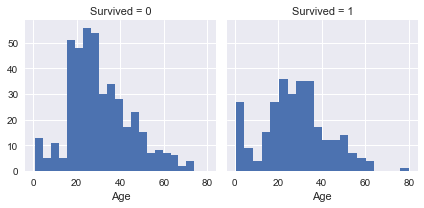

In [17]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

## 关联数值特征和序列数特征

我们可以组合多个功能，使用单个图来识别相关性。这可以用具有数值的数字和分类特征来完成。

### 观察

- Pclass=3 有大多数乘客，但大多数人没有生存。确认了我们的分类假设 #2。
- Pclass=2 和 Pclass=3 的婴儿乘客大多存活下来。进一步符合了我们的分类假设 #2。
- Pclass=1 中的大多数乘客幸存下来。确认我们的分类假设 #3。
- Pclass 在乘客年龄分布方面各不相同。

### 决定

- 将 Pclass 纳入训练模型中。

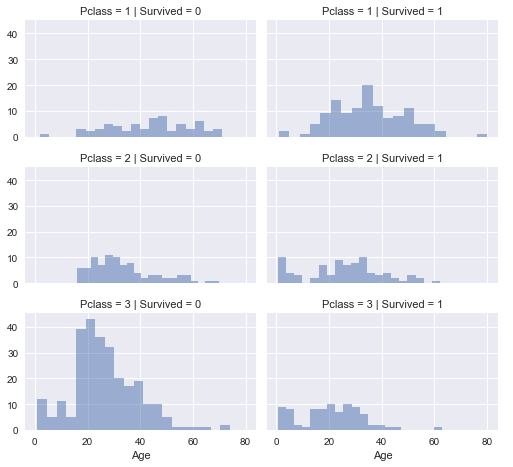

In [18]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

## 关联类别特征

现在我们可以将类别特征与目标相关联。

### 观察

- 女乘客的生存率要高于男性。确认了分类假设 #1。
- Embarked=C 的男性存活率较高。这可能是 Pclass 和 Embarked 之间的相关性。由于 Pclass 和 Survived 之间的可能存在相关性，Embarked 和 Survived 并不一定是直接相关的。
- 在C和Q港口，Pclass=3 的男性存活率比 Pclass=2 的高。（补全假设 #2）。
- Pclass=3 的男性乘客中在不同的港口登船的有不同的成活率。（关联假设 #1）。

### 决定

- 增加 Sex 特征进行模型训练。
- 补全 Embarked 特征进行模型训练。

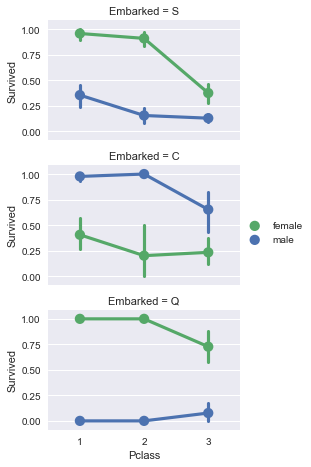

In [19]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

## 关联类别特征和数值特征

我们想要将类别特征（非数字值）和数值特征相关联。我们可以考虑将 Embarked（类别非数字）、Sex（类别非数字）、Fare（数字连续型）和 Survived（类别数字）相关联。

### 观察

- 支付高昂费用的乘客的存活率更高。证实了我们的创建假设 #4。
- 港口与存活率之间是存在关联的。证实了关联假设 #1 和补全假设 #2。

### 决定

- 考虑将 Fare 分段

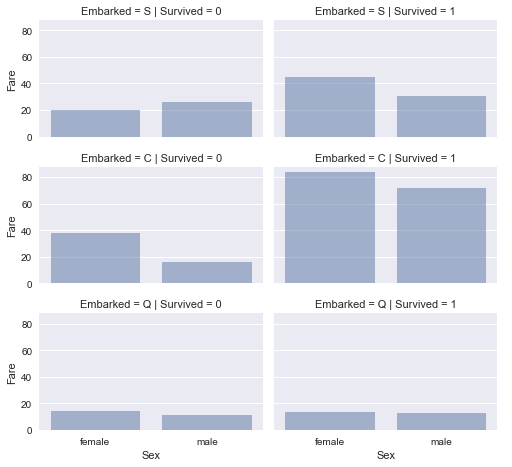

In [20]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## 整合数据

我们收集了有关我们的数据集和解决方案的几个假设和决策。让我们现在执行我们的决定和假设。

### 通过舍弃特征修正数据

这是一个很好的起始目标。通过删除特征，我们可以处理更少的数据。加快我们的记录和分析。

根据我们的假设和决定，我们要删除 Cabin（Correcting #2）和 Ticket（Correcting #1）。

请注意，我们应该对训练数据集和测试数据集同时执行操作以保持一致。

In [21]:
print('Before', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print('After', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

('Before', (891, 12), (418, 11), (891, 12), (418, 11))
('After', (891, 10), (418, 9), (891, 10), (418, 9))


### 从现有特征提取新的特征提取

在删除 Name 和 PassengerId 特征之前，我们想要分析能否可以从 Name 特征中提取出 Title 特征，并分析 Title 与 Survived 之间的相关性。

在下面的代码中，我们使用正则表达式提取 Title 特征。RegEx 模式（\w+\.）匹配 Name 特征中以点字符结尾的第一个单词。 expand=False 标志返回一个 DataFrame。

### 观察

- 大部分的 Title 可以聚集成组。
- Title 特征与 Survived 可能相关。
- 有特定的 Title 的人大多数都存活下来了（例如：Mme、Lady、Sir）。

### 决定

将新特征 Title 纳入训练模型中。

In [22]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


我们可以用更常用的 Title 替换一些 Title，或者将它们分类为 Rare。

In [23]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


我们再将 Title 转换为序数。

In [24]:
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs':3, 'Master':4, 'Rare': 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


现在我们可以安全的删除 Name 和 PassengerId 特征了。

In [25]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

print(train_df.shape, test_df.shape)

((891, 9), (418, 9))


## 转换类别特征

现在我们将包含字符串的特征转换为数值特征。这是大多数模型算法所必需的。这样做也将有助于我们完成特征补全。

让我们先将 Sex 特征转换成 Gender 特征，取值为 female=1 和 male=0。

In [26]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


## 补全数值型连续型特征

现在我们应该开始估计和补全具有缺失值或空值的特征。我们将首先为 Age 特征做这件事。

我们有 3 中方法去补全一个数值型连续型特征。

1. 一种简单的方法是通过特征的平均值和标准差去生成一个随机数值。
2. 更加准确的为缺失值估值的方法是使用其他相关联的特征。在这个例子中，我们需要注意 Age、Gender 和 Pclass 之间的关联。在 Pclass 和 Gender 特征的组合的集合中，使用 Age 的中位数为缺失值估值。所以，Pclass=1 和 Gender=0 的 Age 中位数、Pclass=1 和 Gender=1 的 Age 中位数……
3. 结合方法 1 和方法 2。基于 Pclass 和 Gender 特征组合的集合产生的 Age 的平均值和标准差，生成随机数值。

方法 1 和 3 将引入随机噪声。每次执行的结果可能都不同。我们更青睐方法 2。

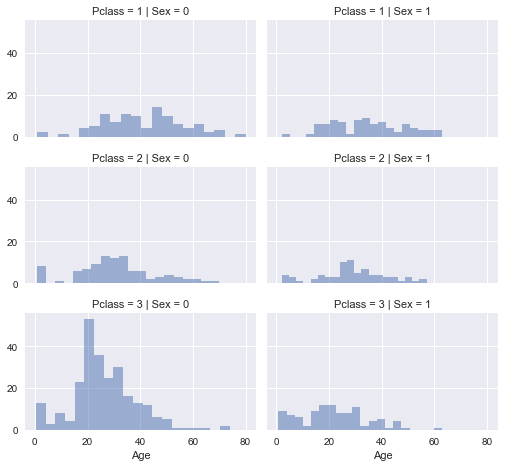

In [27]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

我们准备一个空数组来存储猜测的 Age 值。

In [28]:
guess_ages = np.zeros((2, 3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

现在我们迭代 Sex 和 Pclass 和 6 种组合并计算估计值。

In [29]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j + 1)]['Age'].dropna()
            
            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
            
            age_guess = guess_df.median()
            
            # 将随机的浮点数 Age 转换成最近的整数 Age
            guess_ages[i, j] = int(age_guess / 0.5 + 0.5) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j + 1), 'Age'] = guess_ages[i, j]
                
    dataset['Age'] = dataset['Age'].astype(int)
        
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


让我们创建新特征 Age Band，并且确定它与 Survived 之间的相关性。

In [30]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


让我们使用 AgeBand 将 Age 替换成序列值。

In [31]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


现在我们可以移除 AgeBand 特征。

In [32]:
train_df = train_df.drop(['AgeBand'], axis = 1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


## 组合现有特征创建新特征

通过 Parch 和 SibSp 特征，我们可以创建新特征 FamilySize。这使得我们可以删除 Parch 和 SibSp 特征。

In [33]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


我们可以创建另一个新的特征 IsAlone。

In [34]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


让我们移除 Parch，SibSp 和 FamilySize 这 3 个特征。

In [35]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


我们也可以创建一个新特征，组合 Pclass 和 Age。

In [36]:
for dataset in combine:
    dataset['Age*class'] = dataset['Age'] * dataset['Pclass']
    
train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,NaN,1,3
1,NaN,2,1
2,NaN,1,3
3,NaN,2,1
4,NaN,2,3
5,NaN,1,3
6,NaN,3,1
7,NaN,0,3
8,NaN,1,3
9,NaN,0,2


## 补全一个类别特征

Embarked 特征取值为 S、Q 和 C。我们的训练集中有两处缺失值。我们采用简单的处理方式：使用出现频率最高的值填充缺失值。

In [37]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [38]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


## 将文本型类别特征转换成数值型

我们可以根据 Embarked 特征，将其转换成数值型类别特征。

In [39]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


## 补全和转换一个数值型特征

我们通过一个出现频率最高的 Fare 值去补全缺失值，一行代码就可以解决。

In [40]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


现在我们可以创建新特征 FareBand。

In [41]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


基于 FareBand，将 Fare 特征转换为序列值。

In [42]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


测试集：

In [43]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## 模型，预测和评估

现在，我们可以准备训练模型和预测结果了。大约有 60 多种预测模型供选择。我们必须理解每个问题的类型，然后细化并挑选少量我们能够进行评估的模型。我们现在的问题是一个分类或者回归问题。我们必须通过我们的数据集识别目标变量与多个变量之间的关联。根据这两个指标：有监督的学习 + 分类或者回归，我们可以将我们的选择做一个粗略的筛选：

- Logistic 回归（Logistic Regression）
- K-近邻算法（kKNN or k-Nearest Neighbors）
- 支持向量机（Support Vector Machines）
- 朴素贝叶斯分类器（Naive Bayes classifier）
- 决策树（Decision Tree）
- 随机森林（Random Forrest）
- 感知器（Perceptron）
- 人工神经网络（Artificial neural network）
- 相关向量机（RVM or Relevance Vector Machine）

In [44]:
X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891L,), (418, 8))

Logistic 回归在工作流程的早期是一个十分有用的模型。Logistic 回归测量一个类别变量与一个或多个与其相关的变量之间的相关性，它通过一个 Logistic 函数评估机率。

注意置信分是由基于训练集的模型产生的。

In [45]:
# Logistic 回归

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(acc_log)

80.36


我们可以使用 Logistic 回归去验证我们在特征创建和补全中做出的假设和决定。可以通过计算决策函数中的特征的系数来验证。

正系数表示会增加相应的机率，负系数表示会减少响应的机率。

- Sex 是最大的正系数，暗示着：随着 Sex 值的增加（从 0 到 1：从男到女），Survived=1 的机率也会增加的最多。
- 相反，随着 Pclass 的增加，Survived=1 的机率降低的最多。
- Age*Class 是一个很好的人造特征，因为它对于 Survived 来说，具备了第二高的负相关性。
- 同样的，Title 具有第二高的正系数。

In [46]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201527
5,Title,0.398234
2,Age,0.287164
4,Embarked,0.261762
6,IsAlone,0.129140
3,Fare,-0.085150
7,Age*class,-0.311199
0,Pclass,-0.749006


接下来，我们使用支持向量机来建模。支持向量机是在分类与回归分析中分析数据的监督式学习模型与相关的学习算法。给定一组训练实例，每个训练实例被标记为属于两个类别中的一个或另一个，SVM训练算法创建一个将新的实例分配给两个类别之一的模型，使其成为非概率二元线性分类器。

注意：模型产生的置信分比 Logistic 回归的要高。

In [47]:
# 支持向量机

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.84

在模式识别领域中，最近邻居法是一种用于分类和回归的非参数统计方法。在这两种情况下，输入包含特征空间中的 k 个最接近的训练样本。在 k-NN 分类中，输出是一个分类族群。一个对象的分类是由其邻居的“多数表决”确定的，k 个最近邻居（k 为正整数，通常较小）中最常见的分类决定了赋予该对象的类别。若 k = 1，则该对象的类别直接由最近的一个节点赋予。

KNN 的置信分高于SVM。

In [48]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

在机器学习中，朴素贝叶斯分类器是一系列以假设特征之间强（朴素）独立下运用贝叶斯定理为基础的简单概率分类器。朴素贝叶斯分类器是高度可扩展的，因此需要数量与学习问题中的变量（特征/预测器）成线性关系的参数。最大似然训练可以通过评估一个封闭形式的表达式来完成，只需花费线性时间，而不需要其他很多类型的分类器所使用的费时的迭代逼近。

朴素贝叶斯的置信分最低。

In [49]:
# 高斯朴素贝叶斯

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

在机器学习中，感知器可以被视为一种最简单形式的前馈神经网络，是一种二元线性分类器。

In [50]:
# 感知器

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.0

In [51]:
# 线性 SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.12

In [52]:
# 随机梯度下降

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

76.21

机器学习中，决策树是一个预测模型；他代表的是对象属性与对象值之间的一种映射关系。树中每个节点表示某个对象，而每个分叉路径则代表某个可能的属性值，而每个叶节点则对应从根节点到该叶节点所经历的路径所表示的对象的值。决策树仅有单一输出，若欲有复数输出，可以建立独立的决策树以处理不同输出。 数据挖掘中决策树是一种经常要用到的技术，可以用于分析数据，同样也可以用来作预测。

这种模型的置信分最高。

In [53]:
# 决策树

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

在机器学习中，随机森林是一个包含多个决策树的分类器，并且其输出的类别是由个别树输出的类别的众数而定。

这个模型的置信分数为目前最高。因此，我们决定使用这个模型的输出作为比赛的提交结果。

In [54]:
# 随机森林

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

## 模型评估

现在我们可以对所有模型的评估进行排序，为我们的问题选择最好的模型。当决策树和随机森林得分相同时，我们选择使用随机森林，因为它们会矫正决策树中过拟合等一系列糟糕的问题。

In [55]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
0,Support Vector Machines,83.84
2,Logistic Regression,80.36
7,Linear SVC,79.12
5,Perceptron,78.00
6,Stochastic Gradient Decent,76.21
4,Naive Bayes,72.28


In [58]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred
})
submission.to_csv('../output/submission.csv', index=False)

这大概是我们的第一次尝试，结果不太坏，但也不好。